In [1]:
import numpy as np
from librosa import stft
import matplotlib.pyplot as plt
import time
import tqdm
import pandas as pd

from essentia.standard import Spectrum, Windowing, FrameGenerator

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
y_list_int = y_list.astype(int)

In [4]:
w = Windowing(type = 'hann')
spectrum = Spectrum()

In [5]:
output_list = []
timing = []
for e in range(5):
    t_start = time.time()
    for audio in tqdm.tqdm(y_list_int):
        specs = []
        for frame in FrameGenerator(audio, frameSize=2048, hopSize=512, startFromZero=False):
            spec = spectrum(w(frame))
            specs.append(spec)
        output_list.append(specs)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

  0%|          | 6/1770 [00:00<00:31, 55.60it/s]

31.952999591827393


  0%|          | 6/1770 [00:00<00:31, 55.62it/s]

31.77979803085327


  0%|          | 6/1770 [00:00<00:31, 55.62it/s]

31.818790674209595


  0%|          | 6/1770 [00:00<00:31, 55.62it/s]

31.780730485916138


100%|██████████| 1770/1770 [00:31<00:00, 55.68it/s]

31.89298152923584


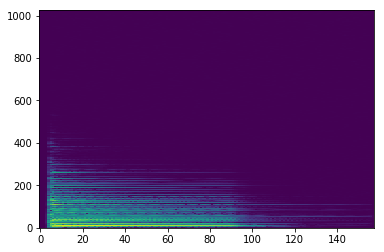

In [7]:
plt.imshow(np.log(np.array(output_list[0]).T+1), aspect='auto', origin='lower')